# Data wrangling and statistics
This tutorial covers essential concepts in descriptive statistics and their implementation in python. 
The tutorial includes:

1. Initial Data Examination
2. Descriptive Statistics
3. Visualizations

To fulfill the goals of this tutorial, we will make use of the Titanic dataset, which contains information about passengers on board the RMS Titanic. Run the code cells below to load the dataset, and the libraries for obtaining descriptive statistics.

In [1]:
# import numpy
import numpy as np
# library for plotting and importing the data
import seaborn as sns
# library for specific stiatistics
from scipy.stats import skew, kurtosis
# library for manipulating and analysing data 
import pandas as pd
# Load and filter the titanic dataset
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived','age', 'sex', 'fare', 'deck', 'class', 'embark_town','alone']]

In [2]:
# for display clarity 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

#message(Info, color=danger, type=note){The Pandas library is used in this tutorial for educational purposes, particularly for illustrating descriptive statistics, as it offers a straightforward and effective way to demonstrate these concepts.}

## Initial Data Examination

It is useful to investigate the dataset before further analysis. The `head()` function returns a brief overview of the first few rows of the data. This initial examination helps you understand how the data is organized (sometimes even showing missing values) and make informed decisions about further approaches.

In [2]:
print(titanic.head())

   survived   age     sex     fare deck  class  embark_town  alone
0         0  22.0    male   7.2500  NaN  Third  Southampton  False
1         1  38.0  female  71.2833    C  First    Cherbourg  False
2         1  26.0  female   7.9250  NaN  Third  Southampton   True
3         1  35.0  female  53.1000    C  First  Southampton  False
4         0  35.0    male   8.0500  NaN  Third  Southampton   True


As illustrated in the output, this version of the dataset consists of 8 variables:

1. `survived`: Indicates whether the passenger survived (0 = No, 1 = Yes).

2. `age`: Age of the passenger.

3. `sex`: Biological sex of the passenger.

4. `fare`: Fare paid for the ticket.

5. `class`: Equivalent to pclass but as a categoriacal data type.

6. `deck`: Deck where the passenger's cabin was located.

7. `embark_town`: Town where the passenger embarked.

8. `alone`: Indicates whether the passenger was traveling alone.

Additionally, the output also reveals missing data (`NaN`), which will be relevant in the tutorial. 

### Dimensionality

In the cell below, the `.shape` attribute returns a tuple with the dimensions of the dataset (rows, columns):

In [3]:
print(titanic.shape)

(891, 8)


### Data types and Structures

Data types refer to the format in which the data is stored. In the cell below the `.dtypes` attribute is used to access the data types of the features in the dataset:

In [4]:
print(titanic.dtypes)

survived          int64
age             float64
sex              object
fare            float64
deck           category
class          category
embark_town      object
alone              bool
dtype: object


The generic Python object data type is called `object`. Objects can reference various types, such as strings, lists, dictionaries, or custom objects. 

## Descriptive Statistics

Descriptive statistics are essential for understanding a dataset, as they offer a concise summary of its key characteristics, including central tendencies, variability, and distribution.

### Summary Statistics 

A dataset can contain numerical and categorical data. Numerical variables represent quantities or measurements, while categorical variables represent categories or labels. To gain meaningful insights, categorical and numerical variables require different types of summaries, as each type provides distinct insights into the data. 

**Numerical summary**

Statistics of numerical variables include quantities such as
* mean (average)
* median (middle value)
* mode (most frequent value)
* range (difference between the maximum and minimum values)
* quartiles (values that divide a dataset into parts containing a certain proportion of the data)
* variance and standard deviation (both are measures of data dispersion)
* skewness (distribution asymmetry) 
* kurtosis (thickness of distribution tail). 

The pandas `describe()` function, and the `skew()` and `kurtosis()` functions from scipy are used in the cell below to calculate the statistics of the Titanic dataset.

In [5]:
# Get summary statistics for numerical columns
numerical_summary = titanic.describe()

# Rename the "50%" row to "median" for clarity
numerical_summary = numerical_summary.rename(index={'50%': 'median'})

# Calculate the range and add it as a new row
numerical_columns = titanic.select_dtypes(include=[np.number])
range_values = numerical_columns.max(numeric_only=True) - numerical_columns.min(numeric_only=True)
numerical_summary.loc['range'] = range_values

# Find the mode 
numerical_summary.loc['mode'] = titanic.select_dtypes(include=[np.number]).mode().iloc[0]

# Calculate variance, skewness, and kurtosis and add as new rows to summary
numerical_columns = titanic.select_dtypes(include=[np.number])
variance_values = numerical_columns.var()
skewness_values = skew(numerical_columns, axis=0)
kurtosis_values = kurtosis(numerical_columns, axis=0)
numerical_summary.loc['variance'] = variance_values
numerical_summary.loc['skewness'] = skewness_values
numerical_summary.loc['kurtosis'] = kurtosis_values

# Reorder the rows for clarity
numerical_summary = numerical_summary.reindex(['count', 'mean', 'median', '25%', '75%','mode', 'min', 'max','range', 'std','variance','skewness','kurtosis'])

# Print the numerical summary statistics
print(numerical_summary)

            survived         age         fare
count     891.000000  714.000000   891.000000
mean        0.383838   29.699118    32.204208
median      0.000000   28.000000    14.454200
25%         0.000000   20.125000     7.910400
75%         1.000000   38.000000    31.000000
mode        0.000000   24.000000     8.050000
min         0.000000    0.420000     0.000000
max         1.000000   80.000000   512.329200
range       1.000000   79.580000   512.329200
std         0.486592   14.526497    49.693429
variance    0.236772  211.019125  2469.436846
skewness    0.477717         NaN     4.779253
kurtosis   -1.771786         NaN    33.204289


Observe a skewness and kurtosis value of `NaN` for the `age` variable. As you progress through the tutorial, you will discover that this variable includes missing values, resulting in an inaccurate calculation of these statistical measures.

**Categorical summary**

Categorical variables have their own statistics, including:
* counts
* percentages of a certain category found in the dataset
* frequencies
* most common values

for each category. The cell below uses the `describe()` function to obtain statistics of categorical variables:

In [6]:
# Get summary statistics for categorical columns
categorical_summary = titanic.describe(include='category')

# For clarity rename top to mode, as the two are equivalent
categorical_summary = categorical_summary.rename(index={'top': 'mode'})

print(categorical_summary)

       deck  class
count   203    891
unique    7      3
mode      C  Third
freq     59    491


These statistics of the categorical variables do not provide insight into the distribution of each category, and therefore no insights into class imbalances (varying number of observation for each class). The cell below calculates the frequency of each unique category within the dataset:

In [7]:
# count the number of observations belonging to each category
category_counts = titanic.select_dtypes(include='category').apply(lambda col: col.value_counts())
# this is only for display purposes
category_counts = category_counts.reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'First', 'Second', 'Third'])
print(category_counts)

        deck  class
A       15.0    NaN
B       47.0    NaN
C       59.0    NaN
D       33.0    NaN
E       32.0    NaN
F       13.0    NaN
G        4.0    NaN
First    NaN  216.0
Second   NaN  184.0
Third    NaN  491.0


The output shows that there is an imbalance in the categorical variables. 

#message(Info, color=info, type=note){Class imbalance is an important topic that will be explored in greater detail later in the course.}

### Covariance

Covariance is a measure of how much variables co-vary (vary together - e.g. when people are taller they also tend to be heavier, so height and weight co-vary). Mathematically, the covariance between two variables $x$ and $y$ is defined as: 

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

where $n$ is the number of samples, $\bar{x}$ and $\bar{y}$ are the means of the variables, and $x_i$ and $y_i$ refer to the actual values of the data from different variables ($x$ and $y$). The cell below computes the covariance between two variables:

In [8]:
def calculate_covariance(x, y):
    """
    x - observations from variable x

    y - observations from variable y
    """
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    covariance = np.sum((x - mean_x) * (y - mean_y)) / (n - 1)
    return covariance


print(calculate_covariance(titanic['age'], titanic['fare']))


59.162200289689366


A positive covariance value indicates that two variables tend to change in the same direction, while a negative covariance value indicates that they tend to change in opposite directions. The magnitude of the covariance value is directly influenced by the scales of the variables involved. For example the variables `age` and `fare` have different units of measurement, which can make it challenging to compare covariances across the pair of variables.

### Correlation

There are multiple definitions of correlation. The Pearson's correlation coefficient $r$ is defined as:

$$
\text{r} = \frac{\text{Cov}(x, y)}{\sigma_x \cdot \sigma_y}
$$

where $\sigma_x$ and $\sigma_y$ are the standard deviations of each variable and measures the relationship between two variables by transforming the covariance into the range between -1 and 1.

Covariance and correlation are similar statistical measures, as both quantify how two variables co-vary. Using the values of the covariance when the two variables have different units of measurment makes interpretation difficult. Standardization in correlation attempts to make this easier. The absolute value of the correlation coefficient indicates the strength of the relationship, with the strength increasing as the values get closer to 1 and -1. The sign of the correlation coefficient (+ or -) indicates the direction of the relationship. A positive correlation means that when one variable increases, the other linearly increases at a constant rate, while a negative correlation means that when one variable increases, the other linearly decreases at a constant rate. A correlation of 0 indicates no linear relationship between two variables.


The code cell below calculates Pearson's correlation between `survived` and `fare` variables in the Titanic dataset:

In [9]:
# get the covariance between
num = calculate_covariance(titanic['survived'], titanic['fare'])
# get all standard deviation for x (survived)
sigma_x =np.sum((np.std(titanic['survived'])))
# get all standard deviation for y (fare)
sigma_y = (np.sum((np.std(titanic['fare']))))

print(num/(sigma_x*sigma_y))

0.25759563083708037


**Multivariate correlation**

Correlation between multiple variables results in a correlation matrix, where each entry in the matrix represents the correlation between two variables. The cell below calculates multivariate correlation for the Titanic dataset using the `corr` function from pandas:

In [10]:
# Calculate the pairwise correlation matrix
correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

          survived       age      fare
survived  1.000000 -0.077221  0.257307
age      -0.077221  1.000000  0.096067
fare      0.257307  0.096067  1.000000


### Missing Data

Missing data refers to absent or incomplete values in a dataset. It's common to encounter missing data due to various reasons such as data collection errors, sensor failures, or because certain information was not collected in individual samples. Dealing with missing data is a crucial step in data preprocessing, as it can significantly impact the accuracy and reliability of any analysis or modeling performed on the dataset. The code cell below identifies the number of missing values for each variable in the dataset, by calling the `isna()` function: 

In [11]:
# Count missing data for each column
print(titanic.isna().sum())

survived         0
age            177
sex              0
fare             0
deck           688
class            0
embark_town      2
alone            0
dtype: int64


The variables `age`, `deck` and `embark_town` contain multiple missing values. For the current tutorial we will not remove or manipulate these values.

### Duplicates

Duplicate rows refer to observations that are identical in all their attribute values across all columns and can arise due to reasons such as missing values, data entry errors, system glitches, or issues during data collection. The `duplicated()` function in pandas identifies and marks duplicate rows:

In [13]:
# Count duplicate rows
print(titanic.duplicated().sum())

107


The Titanic dataset has 107 duplicated rows. It’s important to be careful when deciding whether to keep or remove duplicates. Some duplicates may result from missing data, such as in the age and deck variables, where identical rows could represent different passengers with incomplete information. Removing duplicates without considering this could lead to losing valuable data. Therefore, duplicates were not removed in this tutorial.

### Outliers

Outliers are data points that deviate significantly from the majority of observations in a dataset. Outliers can have a disproportionate impact on statistical measures and modeling results, therefore it's crucial that they are correctly identified and handled.

$Z$-scores, also known as standard scores, are valuable for detecting outliers by quantifying how many standard deviations a data point is away from the mean of the dataset. They provide a standardized measure of deviation that is independent of the scale of the data. $Z$-scores are calculated by subtracting the mean of a variable from a specific data point (indicating how far the data point is from the average) and dividing this difference by the standard deviation.

$$ 
Z = \frac{x - \mu}{\sigma}
$$

Where: 

- $Z$ is the Z-score.
- $x$ is the value of the data point.
- $\mu$ is the mean of the variable in the dataset.
- $\sigma$ is the standard deviation of the variable in the dataset.

The cell below implements the formula:


In [12]:
# Calculate the mean and standard deviation for each numerical column
mean_values = numerical_columns.mean()
std_values = numerical_columns.std()

# Calculate z-scores for each data point in the numerical columns
z_scores = (numerical_columns - mean_values) / std_values


$Z$-values larger than a specific threshold can be considered outliers. The choice of threshold depends on the specific analysis and domain knowledge, or can be learnt. For the current analysis a threshold of $2$ is used:

In [15]:
# Define the z-score threshold for identifying outliers
z_threshold = 2

# Identify and print outliers using z-scores
outliers = titanic[abs(z_scores) > z_threshold]

# Filter to exclude columns with all NaN values
outliers = outliers.dropna(axis=1, how='all')

print(outliers.count())

age     29
fare    38
dtype: int64


In this case 29 outliers were identified for the `age` variable and 38 outliers for the `fare` variable. In this tutorial none of the outliers are removed. 

#message(Note, color=info, type=note){
When dealing with higher dimensional, multivariate data the Mahalanobis distance would be used for outlier detection, which calculates the distance between a data point and the center of a dataset, accounting for the correlations between variables.
}

## Visualizations

While measures like mean, median, mode and standard deviation provide insights into the typical values and spread of data, visualizations offer a more comprehensive understanding by revealing patterns, relationships, and additional information within the dataset. Different data types necessitate the use of specific types of plots. 

### Histograms

A histogram is a graphical representation of the distribution of the data. Histograms are particularly useful for understanding the general tendencies, spread, and shape of the data. The `sns.histplot()` function from the Seaborn library is used to plot a histogram of the fare prices paid by the passengers on Titanic: 

<Axes: xlabel='fare', ylabel='Count'>

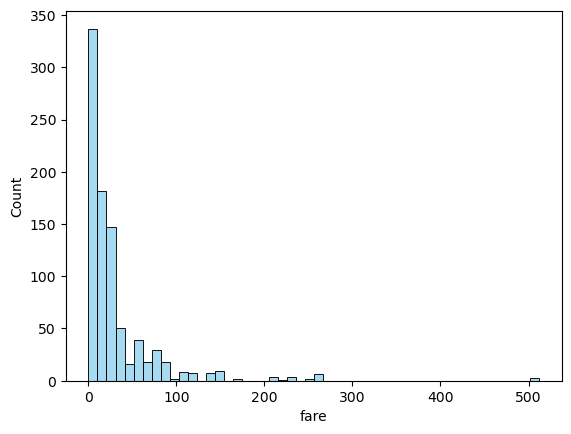

In [13]:
sns.histplot(titanic['fare'], bins=50, color='skyblue')

In this case, the histogram is positively skewed, as it has an elongated tail on the right side. Overall, the histogram shows us that the majority of passengers paid relatively lower fares, while a small number paid high fares, resulting in the elongated tail. The plot illustrates the findings from the numerical summary above, where a skewness value of 5 was calculated. This is considered large and indicates that the distribution is heavily skewed to the right. 

### Box Plots

Similar to histograms, box plots (a.k.a a box-and-whisker plot) are used to visualize the distribution of a variable. Boxplots are particularly useful for comparing the distribution of a variable across different categories or groups. In the cell below we make use of the `sns.boxplot()` function from the Seaborn library, to plot the age of the passengers across different classes in the titanic dataset: 

<Axes: xlabel='class', ylabel='age'>

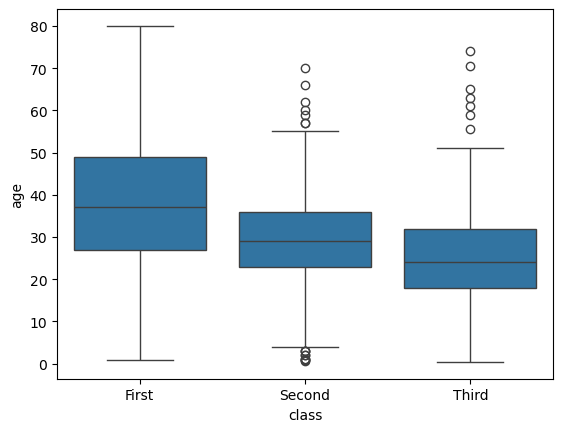

In [14]:
# Create a boxplot of the "fare" column
sns.boxplot(x=titanic['class'], y=titanic['age'])

Each box in the plot represents the age distribution of one of the three passenger classes: First Class (First), Second Class (Second), and Third Class (Third). The vertical position of each box on the y-axis represents the median (50th percentile) age of passengers in that class. The horizontal line inside the box represents the median age. The height of each box shows the interquartile range (IQR), which measures the middle 50% of the age distribution. The vertical lines extending from the boxes are called "whiskers" and represent the range of ages that fall within a reasonable quartile range (Quartile 1 – 1.5 * IQR or Quartile 3 + 1.5 * IQR). Any data points beyond the whiskers are considered outliers. The plot above shows that the median age of passengers differs between classes, where the first class of passengers have the highest median age, and third class have the lowest. The second and third classes have multiple outliers, with the second class having outliers on both ends.  

### Bar Charts 

Bar charts are used to display the frequency of categories within a dataset. They are useful for comparing different categories and understanding their relative sizes. The cell below makes use of the `sns.barplot()` function from the Seaborn library, to provide a visual representation of the class distribution among the passengers: 

/var/folders/yt/h92pzl910zj43znw0k0tll9c0000gn/T/ipykernel_87820/1344548397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


<Axes: xlabel='class'>

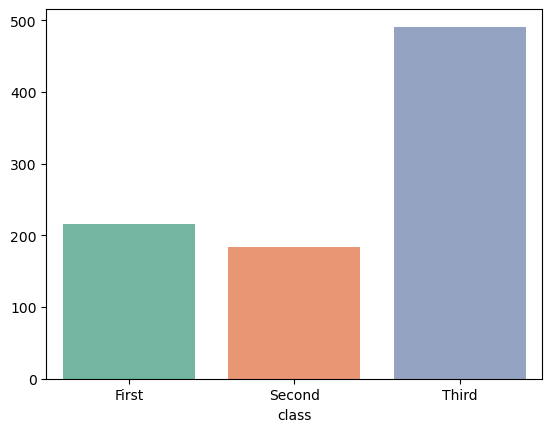

In [15]:
# Count the number of passengers in each class
class_counts = titanic['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

The plot clearly shows a class imbalance, where the third class has the highest number of passengers, while the second class has the lowest. 

### Heatmaps

Heatmaps are commonly used to visualize relationships, patterns, or distributions within complex datasets. Heatmaps are particularly useful for identifying multicollinearity. The Seaborn library contains the `sns.heatmap()` function, used in the cell below to create a heatmap of the correlation matrix: 

<Axes: >

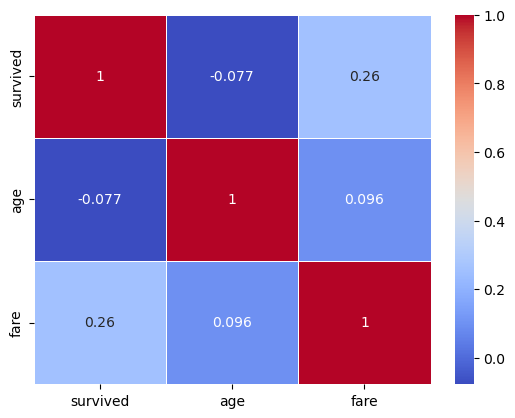

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

Each cell in the heatmap represents the correlation between two numerical variables from the dataset. The color of each cell indicates the strength and direction of the correlation with darker colors indicating stronger, and lighter blue colors indicating weaker or no correlations (close to 0). Dark blue cells represent negative correlations, while red cells represent positive correlations. The intensity of the color corresponds to the magnitude of the correlation coefficient. The numerical values within the cells provide precise correlation coefficients.

### Scatter Plots

Scatter plots are used to visualize the relationship between two numerical variables. Sometimes, outliers can be spotted in scatterplots, as they appear as points far away from the remaining parts of the data. In the cell below the `sns.scatterplot()` function from the Seaborn library is used to visualize the relationship between passenger ages and the fare prices paid:

<Axes: xlabel='age', ylabel='fare'>

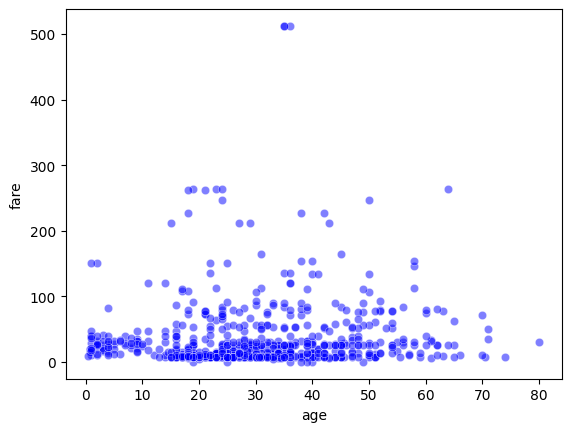

In [20]:
sns.scatterplot(x=titanic['age'], y=titanic['fare'], alpha=0.5, color='b')  # Plot age vs. fare

The scatterplot above shows no discernible pattern or trend between `age` and `fare`, no significant clustering of points is visible, and no clear correlation can be observed, as also indicated by the values of the correlation matrix. 

### Pair Plots

Pair plots are a comprehensive way to visualize the relationships between multiple numerical variables simultaneously. Pair plots can be generated for the `age` and `fare` variables using the `sns.pairplot()` function from the Seaborn library:

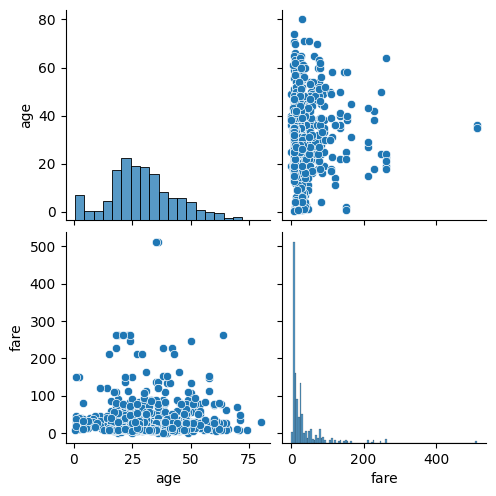

In [21]:
sns.pairplot(titanic[['age', 'fare']])

The plot suggests that there is no correlation between the `age` and `fare` variables. There are distinct patterns in fare distribution (lower right corner), with a concentration of passengers paying lower fares and fewer passengers paying higher fares. 

### Missing Data Patterns

Heatmaps can also provide a quick and intuitive way to identify patterns of missing data. You can create a heatmap of missing data by combining the `sns.heatmap()` function from the seaborn library and the `isna()` function:

<Axes: >

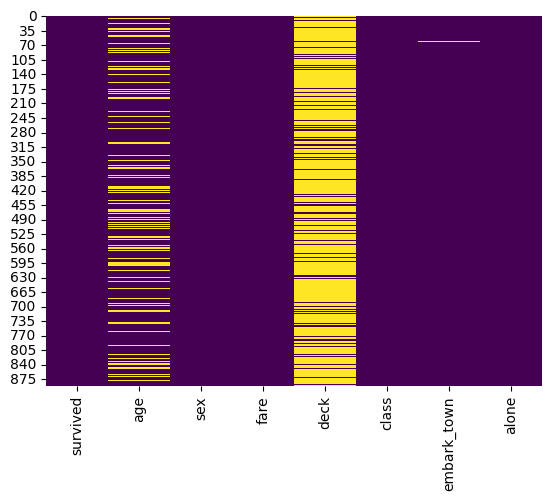

In [22]:
sns.heatmap(titanic.isna(), cbar=False, cmap='viridis')

The heatmap shows missing values as yellow cells, allowing quick identification of which variables (x-axis) and observations (y-axis) have missing data.